Linear Separability (Binary Classification)
Dataset: svm_linear.csv (200 rows, 2 features)
Task: Train an SVM with linear kernel to classify data into two classes.
Report accuracy and decision boundary.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('svm_linear.csv')

In [3]:
df.head()

,feature1,feature2,label
0,0.127071,1.013042,1
1,2.312935,3.770534,1
2,3.340428,3.420996,1
3,3.294548,0.595620,1
4,1.944105,1.477241,1


In [4]:
df.tail()

,feature1,feature2,label
195,-3.325239,0.080488,0
196,-1.741314,2.970952,0
197,-1.581615,2.196672,0
198,1.871664,2.690409,1
199,-0.062896,4.525581,0


In [6]:
df.shape

(200, 3)

In [7]:
df.columns

Index(['feature1', 'feature2', 'label'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  200 non-null    float64
 1   feature2  200 non-null    float64
 2   label     200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [9]:
df.describe()

,feature1,feature2,label
count,200.000000,200.000000,200.000000
mean,0.127291,1.998048,0.500000
std,2.260173,1.029297,0.501255
min,-4.121909,-0.221998,0.000000
25%,-1.731974,1.353238,0.000000
50%,-0.204907,1.866166,0.500000
75%,2.107184,2.679383,1.000000
max,4.663322,5.484226,1.000000


In [13]:
df.dtypes

feature1    float64
feature2    float64
label         int64
dtype: object

In [14]:
df.isnull().sum()

feature1    0
feature2    0
label       0
dtype: int64

In [15]:
df.isna().sum()

feature1    0
feature2    0
label       0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.skew()

feature1    0.062867
feature2    0.371066
label       0.000000
dtype: float64

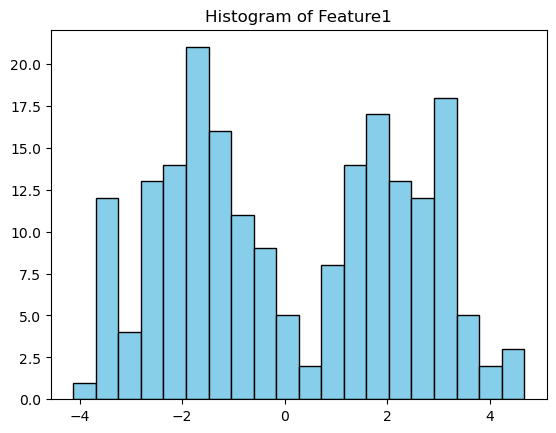

In [20]:
plt.hist(df['feature1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature1')
plt.show()

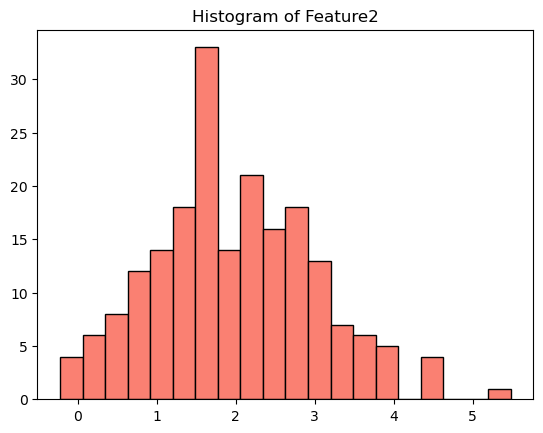

In [21]:
plt.hist(df['feature2'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Feature2')
plt.show()

C:\Users\boomi\AppData\Local\Temp\ipykernel_2220\1889216399.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['feature1'], df['feature2']], labels=['feature1', 'feature2'])
C:\Users\boomi\AppData\Local\Temp\ipykernel_2220\1889216399.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


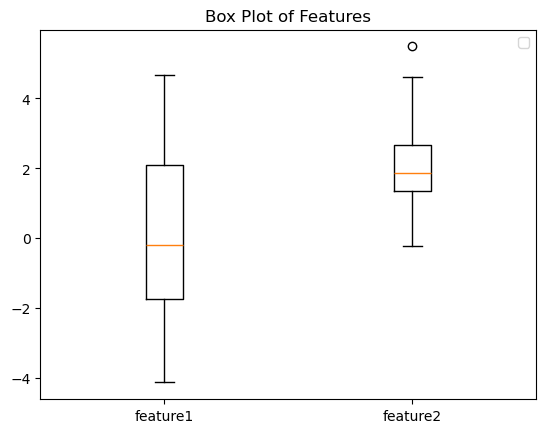

In [23]:
plt.boxplot([df['feature1'], df['feature2']], labels=['feature1', 'feature2'])
plt.title('Box Plot of Features')
plt.legend()
plt.show()

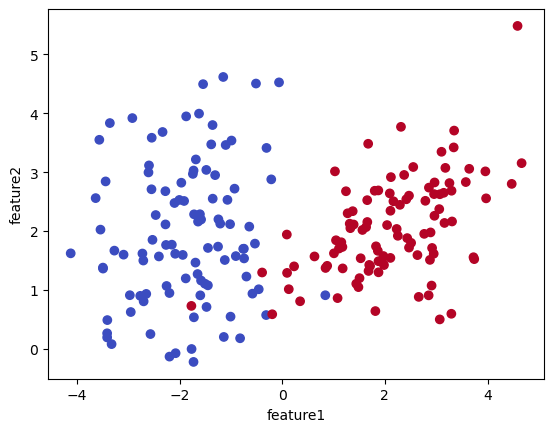

In [33]:
plt.scatter(df['feature1'],df['feature2'],c=df['label'],cmap='coolwarm')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

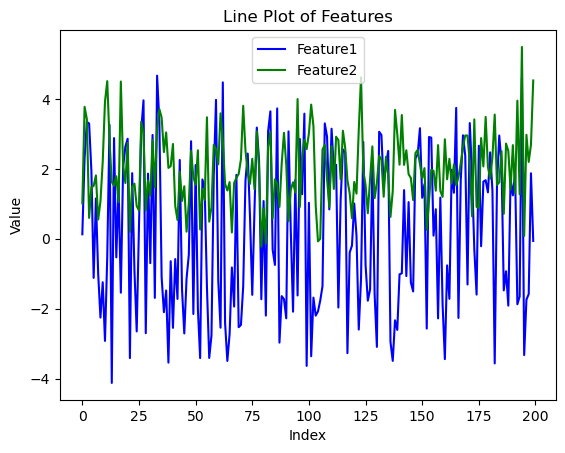

In [24]:
plt.plot(df['feature1'], label='Feature1', color='blue')
plt.plot(df['feature2'], label='Feature2', color='green')
plt.title('Line Plot of Features')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [35]:
df.corr()

,feature1,feature2,label
feature1,1.000000,0.167469,0.886159
feature2,0.167469,1.000000,0.041267
label,0.886159,0.041267,1.000000


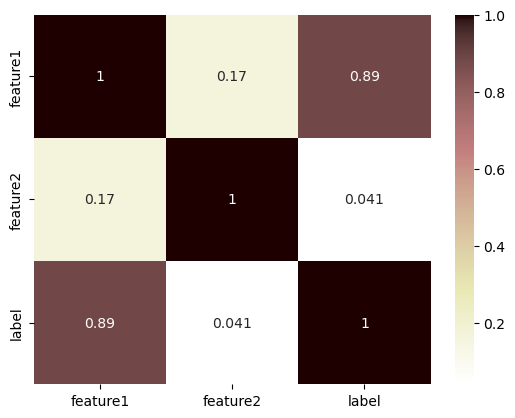

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='pink_r')
plt.show()

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = df.drop(columns='label')
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.975


In [ ]:
df = pd.read_csv("svm_kernel.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear kernel
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)
print("Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))

# RBF kernel
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)
print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))
